# Lecture 5

In [1]:
%run set_env.py
%matplotlib inline

Check versions:
  numpy version     :'1.20.1'
  matplotlib version:'3.3.4'


### Universal Functions (UFuncs)

A <font color="green"><b>universal function (ufunc)</b></font> is:
* a function which operates on an ndarray object in an <font color="green"><b>element-by-element</b></font> fashion
* an instance of the numpy.ufunc class
* a function of which many are implemented in compiled C code
* to which broadcasting rules are applied. 

The concept is similar to the <a href="https://docs.python.org/3/library/functions.html#map">map function</a> in standard Python.

#### Some ufuncs within NumPy: 

* Math operations:
  * add(x1,x2)   (called when invoked a+b)
  * power(x1,x2) (same as '**')
  * mod(x1,x2)
  * exp(x)
  * sqrt(x)
  * log(x)  (Napierian/natural logarithm)
  * ...
* Trig operations:
  * sin(x)
  * sinh(x)
  * arcsinh(x)
  * deg2rad(x)
  * rad2deg(x)
  * ..
* Bit-twiddling operations:
  * bitwise_and(x1,x2)
  * ...
* Comparison functions:
  * greater(x1,x2) (called when x1>x2 is invoked)
  * not_equal(x1,x2) (called when x1!=x2 is invoked)
  * maximum(x1,x2)  (el.-wise max.)
  * isfinite(x)   (el. test for finiteness i.e. neither Infinity nor Not a Number)
  * isinf(x)
  * isnan(x)
  * ...
  
To see all the available ufuncs, see:<br>  
https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

<font color="blue"><b>Note:</b></font>
* One can write its own UFunc -> C-API

#### Examples/Applications of UFuncs:

In [5]:
# Example 1: no BC
np.set_printoptions(precision=5)
import numpy as np
x = np.random.random((2,3,7))
y = np.exp(x)
print(f" x:\n{x}\n")
print(f" y:\n{y}\n")
import math
z=0.5
print(np.exp(z))

 x:
[[[0.17963 0.94007 0.89969 0.96666 0.4813  0.42557 0.65129]
  [0.36308 0.2304  0.83499 0.54115 0.47583 0.67632 0.53782]
  [0.96438 0.54035 0.95628 0.04534 0.5705  0.66032 0.45133]]

 [[0.26173 0.4275  0.61006 0.99651 0.35526 0.12791 0.74525]
  [0.32078 0.05925 0.22357 0.01019 0.3729  0.89301 0.61979]
  [0.04982 0.67784 0.90567 0.5339  0.74233 0.80792 0.29884]]]

 y:
[[[1.19677 2.56017 2.45885 2.62915 1.61817 1.53047 1.91802]
  [1.43775 1.2591  2.30479 1.71799 1.60935 1.96663 1.71226]
  [2.62315 1.71661 2.60199 1.04638 1.76915 1.9354  1.5704 ]]

 [[1.29917 1.53342 1.84054 2.70882 1.42656 1.13645 2.10697]
  [1.3782  1.06104 1.25054 1.01024 1.45193 2.44246 1.85854]
  [1.05108 1.96962 2.47359 1.70557 2.10082 2.24323 1.3483 ]]]

1.6487212707001282


In [6]:
# Example 2: with BC
x=np.arange(90,103,dtype=int)
y=np.arange(2,7,dtype=int).reshape((5,1))
print(f"  x:{x.shape}\n{x}\n")
print(f"  y:{y.shape}\n{y}\n")
z=np.mod(x,y)
print(f"  z:{z.shape}\n{z}\n")

  x:(13,)
[ 90  91  92  93  94  95  96  97  98  99 100 101 102]

  y:(5, 1)
[[2]
 [3]
 [4]
 [5]
 [6]]

  z:(5, 13)
[[0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 2 0 1 2 0 1 2 0 1 2 0]
 [2 3 0 1 2 3 0 1 2 3 0 1 2]
 [0 1 2 3 4 0 1 2 3 4 0 1 2]
 [0 1 2 3 4 5 0 1 2 3 4 5 0]]



### Reductions on ndarrays

* Besides Numpy functions which operate on ndarrays <font color="green"><b>element-wise</b></font> (UFuncs, vide supra),<br>
  there are also Numpy functions which perform <font color="green"><b>reductions</b></font> on ndarrays. 

* By <font color="green"><b>default</b></font>, the reductions operate on the <font color="green"><b>whole</b></font> ndarray.
  
* However, we can specify a particular <font color="green"><b>axis/dimension</b></font> on which to perform the reduction.  

* The functions all have a similar syntax:<br>
  numpy.func_name(a,[axis=None],[dtype=None],[out=None])<br>
  The function <font color="green"><b>func_name</b></font> can be called in 2 different ways:
  * a.func_name()    # <font color="blue"><b>Object-Oriented way</b></font> i.e. method associated to an object
  * np.func_name(a)  # <font color="blue"><b>Procedural way</b></font> i.e. array is an argument of the function

#### Mathematical Operations:
* numpy.sum(), numpy.cumsum()    : sum vs. cumulative sum
* numpy.prod(), numpy.cumprod()  : prod vs. cumulative product
* numpy.min(), numpy.max()       : min, max of a vector
* numpy.argmin(), numpy.argmax() : return indices of the min./max. values

#### Statistical Operations:
* numpy.mean, numpy.median : average, median
* numpy.std, numpy.var     : standard deviation, variance

#### Logical Operations:
* numpy.any(): Test whether ANY el. along a given axis evaluates to True
* numpy.all(): Test whether ALL el. along a given axis evaluate to True

#### Examples

###### Example 1:

In [7]:
# Example 1: 
# Invoke sum over the complete ndarray
a = np.arange(1,25).reshape((2,3,4))
print(f"  a:\n{a}\n")
print(f"  a.shape:{a.shape}\n")
print(f"  a.sum() (Object-oriented syntax): {a.sum()}\n")
print(f"  np.sum(a) (Procedural syntax)   : {np.sum(a)}\n")


  a:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]

  a.shape:(2, 3, 4)

  a.sum() (Object-oriented syntax): 300

  np.sum(a) (Procedural syntax)   : 300



In [8]:
# Invoke sums over certain axes
a = np.arange(1,25).reshape((2,3,4))
red0 = a.sum(axis=0)
print(f"   a.sum(axis=0)   shape:{red0.shape}:\n{red0}\n")
red1 = a.sum(axis=1)
print(f"   a.sum(axis=1)   shape:{red1.shape}:\n{red1}\n")
red2 = a.sum(axis=2)
print(f"   a.sum(axis=2)   shape:{red2.shape}:\n{red2}\n")

   a.sum(axis=0)   shape:(3, 4):
[[14 16 18 20]
 [22 24 26 28]
 [30 32 34 36]]

   a.sum(axis=1)   shape:(2, 4):
[[15 18 21 24]
 [51 54 57 60]]

   a.sum(axis=2)   shape:(2, 3):
[[10 26 42]
 [58 74 90]]



###### Example 2:

In [13]:
np.set_printoptions(precision=4)
b = rnd.random((3,7))
print(f"  b:\n{b}\n")
print(f"  b.shape:{b.shape}\n")

av = b.mean(axis=0)
print(f"  b.mean(axis=0):\n{av}\n")

bool_matrix = b < 0.05
print(f"  bool_matrix:\n{bool_matrix}\n")
print(f"  Are they any values < 0.01? {bool_matrix.any()}")

  b:
[[0.4472 0.0905 0.5184 0.3882 0.9871 0.9803 0.8129]
 [0.3646 0.8106 0.5513 0.6696 0.794  0.0055 0.5066]
 [0.4301 0.8048 0.8255 0.6921 0.5685 0.4563 0.0981]]

  b.shape:(3, 7)

  b.mean(axis=0):
[0.414  0.5686 0.6317 0.5833 0.7832 0.4807 0.4726]

  bool_matrix:
[[False False False False False False False]
 [False False False False False  True False]
 [False False False False False False False]]

  Are they any values < 0.01? True


### Exercises:

* Generate the following vector [ 1, 3, 9, 27, ... , 729] using a UFunc.
 
* Generate a 5x10 array A with random numbers $x$ $\in$ $[0,1[$.
  * What is the maximum value for all $x$ in A?
  * What is the minimum value in each column?
  * What is the minimum value in the fourth row?
  * Are there any random numbers $x<\alpha$ or $x>\beta$?<br>You can set $\alpha:=0.02$ and $\beta:=0.98$
  
* Write the function *calc_sn(n)* (<font color="red">**without the use of for loops!**</font>): 
  * The function *calc_sn(n)* returns an array of partial sums $S_n$ ($n>0$) given by:<br>
    $\begin{equation*}
      S_n := \sum_{k=1}^{k=n} \frac{sin(k)}{k^2} 
      \end{equation*}
    $ 
  * Generate the plot $S_n$ where $n$ $\in$ $\{1,\ldots,100\}$ to visualize the absolute convergency of the series.    

  

### Solutions:

In [ ]:
# %load ../solutions/ex5.py

In [16]:
A= 3**np.arange(7)
print(A)

[  1   3   9  27  81 243 729]


In [21]:
A= rnd.random((5,10))
print(A)
print(A.max())
print(A.min(axis=0))
print(A[3,:].min())
mybool = (A<0.02) | (A>0.98)
print(mybool)
print(mybool.any())

[[0.3351 0.5494 0.6649 0.262  0.1018 0.6494 0.973  0.7389 0.9094 0.5885]
 [0.783  0.2349 0.2064 0.6941 0.8842 0.3311 0.2437 0.1301 0.5826 0.0482]
 [0.1743 0.3249 0.841  0.8672 0.0826 0.6669 0.4776 0.4816 0.7935 0.7169]
 [0.2829 0.4149 0.6542 0.0026 0.3826 0.3917 0.9997 0.5137 0.0302 0.7725]
 [0.2229 0.0948 0.2573 0.0609 0.6884 0.5932 0.3926 0.9827 0.0076 0.1394]]
0.9996663596354769
[0.1743 0.0948 0.2064 0.0026 0.0826 0.3311 0.2437 0.1301 0.0076 0.0482]
0.0026237216934774654
True


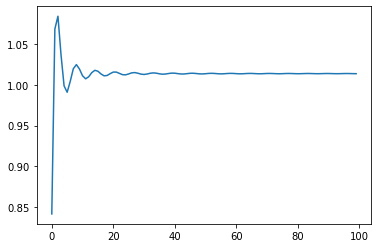

In [19]:
def calc_sn(n):
    k = np.arange(1,n+1)
    ratio = np.sin(k)/k**2
    return np.cumsum(ratio)

import matplotlib.pyplot as plt
plt.plot(calc_sn(100))
